# A) Catégorisation des articles du magazine Québec Science en sces humaines ou sces naturelles

In [166]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
# création d'une liste des noms des colonnes d'intérêt à extraire du fichier csv
# list of columns to be extracted from Excel table

liste_col = ['numéro', 'mots_clefs', 'catégorie']

In [167]:
# création du fichier comportant les 3 colonnes d'intérêt du fichier 'qs_sans_dossiers_500.csv'
# les 500 premiers articles ont été catégorisés manuellement : 'naturelles' ou 'humaines'

# uploading 3 columns of interest from csv file
# the first 500 rows are articles manually classified as 'humanities' or 'natural' (sciences)

md = pd.read_csv('qs500.csv', usecols=liste_col)   
md


,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,15/07/1979,Kung-fu -- Physique,NaN
4551,15/07/1979,Eau potable\nToxicomanie\nHydrologie\nPollutio...,NaN
4552,15/07/1979,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,NaN
4553,15/07/1979,Psychiatrie -- Québec (Province),NaN


In [232]:
# le fichier md comprend 3 colonnes : date de parution de l'article, mots-clefs de l'article
# et pour les 502 premiers articles, une catégorisation 'naturelles' ou 'humaines'

md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numéro      4555 non-null   object
 1   mots_clefs  4555 non-null   object
 2   catégorie   4555 non-null   object
dtypes: object(3)
memory usage: 106.9+ KB


In [233]:
# extraction des 500 premières rangées comprenant les articles 
# manuellement catégorisés sciences 'naturelles' ou sciences 'humaines'

# extraction of the first 500 rows that include the articles manually classified as 
# belonging to humanities or natural sciences.

md_analyse = md.loc[:501]
# qs_analyse.info()
md_analyse

,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
497,15/11/2016,Chimie végétale\nComposés bioactifs végét...,naturelles
498,15/11/2016,"Perreault, Jacques\nSites archéologiques -- G...",humaines
499,15/11/2016,Empirisme\nSciences\nParasciences\nModèles de...,humaines
500,15/11/2016,Obésité -- Étiologie et facteurs de risque\...,humaines


In [234]:
# extraction des catégories des articles déjà classés
# extraction of the classification values of the training data

predictions1 = md_analyse['catégorie']
predictions1

0      naturelles
1      naturelles
2      naturelles
3      naturelles
4      naturelles
          ...    
497    naturelles
498      humaines
499      humaines
500      humaines
501    naturelles
Name: catégorie, Length: 502, dtype: object

In [235]:
# entraînement de l'algorithme qui apprend à associer les mots-clefs avec leur catégorie.
# algorithm trained on words column using the information in column 'category' as criteria

x, y = md_analyse.mots_clefs, md_analyse.catégorie
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)   

In [236]:
# on crée un vocabulaire d'au plus de 1000 mots (max_features) les plus fréquents
# certains de ces mots seronts plus souvent associés aux sciences humaines,
# d'autres aux sciences naturelles; ce qui permettra de catégoriser les paquets de mots-clefs
# associés aux articles.


# a maximum of 1000 words will be used to create the classification vocabulary.
# only the words that will occur at least three times in all the bags of keywords will be taken into account for the construction of the vocabulary
# and the words that occur 70% and more often amongst keywords will be eleminated as irrelevant and not included in the classification vocabulary.

converter = TfidfVectorizer(max_features=1000, min_df=3, max_df=0.7, encoding="utf-8")
converter.fit(x_train)

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=3)

TfidfVectorizer(max_df=0.7, max_features=1000, min_df=3)

In [237]:
# numérisation des mots-clefs qui deviennent leurs fréquences respectives dans le vocabulaire.
# chaque paquet de mots-clefs représentant un article devient une matrice de ces nombres,

# the 'converter' calculates the frequency of each word within the classification vocabulary (max: 1000 words) 
# and maps these frequencies for each word from each 'bag of keywords'.
# the bag of keywords describing an article becomes a list of the probabilities for each keyword.

x_train_converted = converter.transform(x_train)
x_train_converted = converter.transform(x_train).toarray()

In [238]:
# l'algorithme RandomForest crée un maximum de 1000 arbres de classification
# RandomForest will create a maximum of 1000 classification trees.

classifier = RandomForestClassifier(n_estimators=1000, random_state=0, oob_score=True)

classifier.fit(x_train_converted, y_train)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=0)

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=0)

In [239]:
# transformation des mots-clefs mis en réserve pour vérifier l'efficacité de l'algorithme
# transformation of the test kewwords in frequencies.

x_test_converted = converter.transform(x_test).toarray()

In [240]:
# vérification de l'efficacité de l'algorithme
# verification if the algorithm corectly classifies the 'bag of words' of unclassified articles

y_pred = classifier.predict(x_test_converted)

In [241]:
# impression du rapport sur les performances de l'algorithme
# printing of reports on the performance of the algorithm

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    humaines       0.91      0.59      0.71        17
  naturelles       0.82      0.97      0.89        34

    accuracy                           0.84        51
   macro avg       0.87      0.78      0.80        51
weighted avg       0.85      0.84      0.83        51

0.8431372549019608


In [242]:
# extraction des mots-clefs des articles non classés
# extraction of the keywords of the uncategorized articles

md_non_catégorisés_mots_clefs = md[502:].mots_clefs

In [243]:
# numérisation des mots-clefs des articles non classés
# conversion of the unclassified bags of keywords into their frequencies for each article

md_non_catégorisés_mots_clefs_converted = converter.transform(md_non_catégorisés_mots_clefs).toarray()

In [244]:
# l'algorithme classifie la masse des articles non classés
# algorithm RandonForest is asked to classify the bulk of the articles 

predictions = classifier.predict(md_non_catégorisés_mots_clefs_converted)
len(predictions)

4053

In [245]:
# tous les articles sont maintenant catégorisés, un petit manuellement, les autres par l'algorithme
# that makes available categorization for all 4555 articles

print(len(predictions1))
print(len(predictions))

502
4053


In [246]:
# fusion en un seul fichier de tous les classements des 4555 articles
# merging of classification data into one column for all 4555 articles.

predictions = np.concatenate([predictions1, predictions])
print(len(predictions))
predictions

4555


array(['naturelles', 'naturelles', 'naturelles', ..., 'naturelles',
       'naturelles', 'naturelles'], dtype=object)

In [247]:
# on ajoute l'information de catégorisation au fichier des 4555 articles
# et on imprime les premiers et derniers articles -- avec leur catégorie -- du fichier
# et on constate les limites de l'algorithme!
# all articles in the original dataframe are classified as 'natural sciences' or 'humanities'

md['catégorie'] = predictions
md.info()
md

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   numéro      4555 non-null   object
 1   mots_clefs  4555 non-null   object
 2   catégorie   4555 non-null   object
dtypes: object(3)
memory usage: 106.9+ KB


,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,15/07/1979,Kung-fu -- Physique,naturelles
4551,15/07/1979,Eau potable\nToxicomanie\nHydrologie\nPollutio...,naturelles
4552,15/07/1979,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,naturelles
4553,15/07/1979,Psychiatrie -- Québec (Province),naturelles


In [248]:
# vérification de la catégorisation d'articles choisis au hasard, en utilisant l'index
# impression pour l'article (son paquet de mots-clefs) et de sa catégorie

# one on one verification of the classification using index value to retrieve specific article and its 'algorithmic' category.
# articles have been categorized by the algorithm from row 501 to 4554
# index number delivers the bag of keywords and the category 'according to RandomForeest'. 

index = 1117

print(md.iloc[index].mots_clefs)
print(md.iloc[index].catégorie)

Agressivité chez l'enfant
Enfants agressifs, Intervention auprès des
Violence dans les écoles -- Québec (Province)
Violence dans les écoles -- Prévention -- Québec (Province)
humaines


In [249]:
# extraction du vocabulaire de classification, en ordre alphabétique.
# extraction of the most significat words of the classification vocabulary

classifier.feature_importances_
print(converter.get_feature_names_out())
print(len(converter.get_feature_names_out()))

['19' '2017' '2018' '2019' '2020' '2022' 'accidents' 'acoustique'
 'adaptation' 'adn' 'ae' 'afrique' 'agriculture' 'aire' 'aires' 'al'
 'alimentaire' 'alimentation' 'aliments' 'alite' 'ame' 'analyse'
 'anciennes' 'animaux' 'anne' 'ants' 'appareils' 'applications'
 'apprentissage' 'approvisionnement' 'arche' 'archives' 'art'
 'artificielle' 'artificiels' 'aspect' 'astronomie' 'astronomiques'
 'atmosphe' 'attitude' 'au' 'autochtones' 'bacte' 'baie' 'be' 'bec'
 'biodiversite' 'biographies' 'biologique' 'blessures' 'canada' 'cancer'
 'captage' 'carbonique' 'caroline' 'ce' 'centre' 'cerveau' 'ces'
 'changements' 'chauffement' 'chercheurs' 'chets' 'chez' 'chimie'
 'chimiques' 'ciaux' 'citoyens' 'climat' 'climatiques' 'cliniques'
 'cognitives' 'collections' 'cologie' 'cologique' 'colombie' 'commerce'
 'communication' 'communications' 'compenses' 'complications'
 'comportement' 'conception' 'conditions' 'conomie' 'conomique'
 'conomiques' 'conservation' 'consommateurs' 'consommation' 'construc

In [250]:
# impression des 25 mots les plus influents dans le processus de catégorisation.

# creation of a DataFrame with these as columns which will rate the importance of the word 
# in its capacity to categorize the bags of keywords.

pd.DataFrame(index=converter.get_feature_names_out(), 
             data=classifier.feature_importances_).sort_values(by=0,ascending=False).head(25)


,0
histoire,0.068467
sciences,0.035649
politique,0.027190
social,0.026268
recherche,0.023276
psychologique,0.020639
aspect,0.019259
des,0.017383
de,0.017261
moral,0.015030


# B) Calcul du nombre d'articles 'sces humaines' et 'sces naturelles' pour chaque numéro du magazine Québec Science

In [251]:
# création d'une copie du fichier md

qs = md.copy()
qs

,numéro,mots_clefs,catégorie
0,15/07/2023,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,15/07/2023,antibiorésistance,naturelles
2,15/07/2023,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,15/07/2023,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,15/07/2023,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,15/07/1979,Kung-fu -- Physique,naturelles
4551,15/07/1979,Eau potable\nToxicomanie\nHydrologie\nPollutio...,naturelles
4552,15/07/1979,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,naturelles
4553,15/07/1979,Psychiatrie -- Québec (Province),naturelles


In [252]:
# transformation de la date de parution en date format 'datetime'
# le format datetime permet les opérations en fonction des dates de parution des articles.
# par exemple, la sommation selon certaines périodes de temps.

qs['numéro'] = pd.to_datetime(qs['numéro'], format='%d/%m/%Y')
qs

,numéro,mots_clefs,catégorie
0,2023-07-15,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,2023-07-15,antibiorésistance,naturelles
2,2023-07-15,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,2023-07-15,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,2023-07-15,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,1979-07-15,Kung-fu -- Physique,naturelles
4551,1979-07-15,Eau potable\nToxicomanie\nHydrologie\nPollutio...,naturelles
4552,1979-07-15,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,naturelles
4553,1979-07-15,Psychiatrie -- Québec (Province),naturelles


In [253]:
# vérification que notre fichier comporte vraiment une colonne date en format 'datetime'

qs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4555 entries, 0 to 4554
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   numéro      4555 non-null   datetime64[ns]
 1   mots_clefs  4555 non-null   object        
 2   catégorie   4555 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 106.9+ KB


In [254]:
# la colonne 'numéro' devient la colonne 'date'

qs.rename(columns={'numéro': 'date'}, inplace=True)
qs

,date,mots_clefs,catégorie
0,2023-07-15,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
1,2023-07-15,antibiorésistance,naturelles
2,2023-07-15,Limaces -- Québec (Province)\nAnimaux et plan...,naturelles
3,2023-07-15,Insectarium de Montréal. Grand Vivarium\nPapi...,naturelles
4,2023-07-15,Paillettes -- Aspect de l'environnement\nProdu...,naturelles
...,...,...,...
4550,1979-07-15,Kung-fu -- Physique,naturelles
4551,1979-07-15,Eau potable\nToxicomanie\nHydrologie\nPollutio...,naturelles
4552,1979-07-15,Alcoolisme\nCégeps\nJeunesse québécoise\nTo...,naturelles
4553,1979-07-15,Psychiatrie -- Québec (Province),naturelles


In [255]:
# le fichier contient les articles selon leur ordre chronologique

qs.sort_values(by=['date'], ascending=False, inplace=True)
qs


,date,mots_clefs,catégorie
0,2023-07-15,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
7,2023-07-15,Comité de restauration du bassin versant de l...,naturelles
1,2023-07-15,antibiorésistance,naturelles
12,2023-07-15,"Meier, Iwan\nFinances -- Aspect de l'environne...",humaines
11,2023-07-15,Cannabis -- Emploi en thérapeutique -- Recher...,naturelles
...,...,...,...
4505,1979-05-15,Déficience intellectuelle\nHypothyroïdie,naturelles
4504,1979-05-15,Rayonnement\nÉnergie nucléaire -- États-Uni...,naturelles
4503,1979-05-15,Réacteurs CANDU\nRéacteurs nucléaires -- Se...,naturelles
4502,1979-05-15,Bois\nPoteaux,naturelles


In [256]:
# l'index du fichier devient la colonne des dates en format 'datetime'

qs.index = qs['date']
qs

,date,mots_clefs,catégorie
date,,,
2023-07-15,2023-07-15,World Mosquito Program (Projet)\nMoustiques (V...,naturelles
2023-07-15,2023-07-15,Comité de restauration du bassin versant de l...,naturelles
2023-07-15,2023-07-15,antibiorésistance,naturelles
2023-07-15,2023-07-15,"Meier, Iwan\nFinances -- Aspect de l'environne...",humaines
2023-07-15,2023-07-15,Cannabis -- Emploi en thérapeutique -- Recher...,naturelles
...,...,...,...
1979-05-15,1979-05-15,Déficience intellectuelle\nHypothyroïdie,naturelles
1979-05-15,1979-05-15,Rayonnement\nÉnergie nucléaire -- États-Uni...,naturelles
1979-05-15,1979-05-15,Réacteurs CANDU\nRéacteurs nucléaires -- Se...,naturelles


In [257]:
# les dates de parution représentent désormais les articles et les mots-clefs inutiles

qs.drop(columns=['mots_clefs'], inplace=True)
qs

,date,catégorie
date,,
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,humaines
2023-07-15,2023-07-15,naturelles
...,...,...
1979-05-15,1979-05-15,naturelles
1979-05-15,1979-05-15,naturelles
1979-05-15,1979-05-15,naturelles


In [258]:
# l'index demeure les dates format 'datetime', mais la colonne 'date' devient 'numéro'

qs.rename(columns={'date': 'numéro'}, inplace=True)
qs

,numéro,catégorie
date,,
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,naturelles
2023-07-15,2023-07-15,humaines
2023-07-15,2023-07-15,naturelles
...,...,...
1979-05-15,1979-05-15,naturelles
1979-05-15,1979-05-15,naturelles
1979-05-15,1979-05-15,naturelles


In [259]:
# confirmation que la colonne 'datetime' est bien l'index du fichier.

qs.index

DatetimeIndex(['2023-07-15', '2023-07-15', '2023-07-15', '2023-07-15',
               '2023-07-15', '2023-07-15', '2023-07-15', '2023-07-15',
               '2023-07-15', '2023-07-15',
               ...
               '1979-05-15', '1979-05-15', '1979-05-15', '1979-05-15',
               '1979-05-15', '1979-05-15', '1979-05-15', '1979-05-15',
               '1979-05-15', '1979-05-15'],
              dtype='datetime64[ns]', name='date', length=4555, freq=None)

In [260]:
# compilation du nombre d'articles de chacune des deux catégories par numéro du magazine

qs_hn = pd.pivot_table(qs, values='numéro', index=['date','catégorie'], aggfunc='count')
print(qs_hn.info())
qs_hn

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 823 entries, (Timestamp('1979-05-15 00:00:00'), 'humaines') to (Timestamp('2023-07-15 00:00:00'), 'naturelles')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   numéro  823 non-null    int64
dtypes: int64(1)
memory usage: 12.4+ KB
None


numéro
date       catégorie         
1979-05-15 humaines         2
           naturelles      16
1979-07-15 humaines         1
           naturelles      18
1979-08-15 humaines         4
...                       ...
2023-04-15 naturelles       6
2023-06-15 humaines         3
           naturelles       9
2023-07-15 humaines         1
           naturelles      12

[823 rows x 1 columns]

In [261]:
# opération facilitant l'extraction des nombres d'articles par no par catégorie

hn = qs_hn.unstack()
print(hn.info())
hn

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 1979-05-15 to 2023-07-15
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (numéro, humaines)    392 non-null    float64
 1   (numéro, naturelles)  431 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB
None


numéro           
catégorie  humaines naturelles
date                          
1979-05-15      2.0       16.0
1979-07-15      1.0       18.0
1979-08-15      4.0       12.0
1979-09-15      2.0       17.0
1979-10-15      2.0        7.0
...             ...        ...
2023-01-15      7.0        6.0
2023-03-15      8.0        4.0
2023-04-15      3.0        6.0
2023-06-15      3.0        9.0
2023-07-15      1.0       12.0

[431 rows x 2 columns]

In [262]:
# 'NaN' indique que certaines numéro du magazine ne comptent aucun articles en sciences humaines

hn.head(60)

numéro           
catégorie  humaines naturelles
date                          
1979-05-15      2.0       16.0
1979-07-15      1.0       18.0
1979-08-15      4.0       12.0
1979-09-15      2.0       17.0
1979-10-15      2.0        7.0
1979-11-15      2.0       11.0
1979-12-15      4.0        9.0
1980-01-15      2.0       11.0
1980-02-15      2.0       15.0
1980-03-15      1.0       17.0
1980-04-15      1.0       17.0
1980-05-15      5.0       15.0
1980-06-15      3.0       17.0
1980-07-15      2.0       16.0
1980-08-15      1.0       13.0
1980-09-15      4.0       16.0
1980-10-15      3.0       12.0
1980-11-15      1.0       13.0
1980-12-15      4.0       14.0
1981-01-15      3.0       15.0
1981-02-15      1.0       14.0
1981-03-15      1.0       16.0
1981-04-15      2.0       12.0
1981-05-15      2.0       13.0
1981-06-15      4.0       16.0
1981-07-15      4.0       18.0
1981-08-15      3.0       14.0
1981-09-15      3.0       17.0
1981-10-15      3.0       14.0
1981-11-15      3.0       12.0
1981-12-15      2.0       13.0
1982-01-15      2.0       10.0
1982-02-15      3.0       12.0
1982-03-15      1.0       13.0
1982-04-15      3.0       13.0
1982-05-15      2.0       13.0
1982-06-15      1.0       14.0
1982-07-15      3.0       16.0
1982-08-15      3.0        9.0
1982-09-15      2.0       14.0
1982-10-15      4.0       13.0
1982-11-15      2.0       13.0
1982-12-15      3.0       13.0
1983-01-15      2.0       16.0
1983-02-15      3.0       13.0
1983-03-15      4.0       12.0
1983-04-15      1.0       13.0
1983-05-15      1.0       10.0
1983-06-15      1.0       13.0
1983-07-15      3.0        9.0
1983-08-15      3.0       11.0
1983-09-15      3.0       11.0
1983-10-15      NaN       17.0
1983-11-15      1.0       12.0
1983-12-15      NaN       20.0
1984-01-15      1.0       14.0
1984-02-15      2.0       15.0
1984-03-15      1.0       11.0
1984-04-15      1.0       13.0
1984-05-15      NaN       10.0

In [264]:
# remplacement des 'NaN' par une valeur numérique : 0

hn = hn.fillna(0.0)
hn.info()
hn

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 431 entries, 1979-05-15 to 2023-07-15
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (numéro, humaines)    431 non-null    float64
 1   (numéro, naturelles)  431 non-null    float64
dtypes: float64(2)
memory usage: 10.1 KB


numéro           
catégorie  humaines naturelles
date                          
1979-05-15      2.0       16.0
1979-07-15      1.0       18.0
1979-08-15      4.0       12.0
1979-09-15      2.0       17.0
1979-10-15      2.0        7.0
...             ...        ...
2023-01-15      7.0        6.0
2023-03-15      8.0        4.0
2023-04-15      3.0        6.0
2023-06-15      3.0        9.0
2023-07-15      1.0       12.0

[431 rows x 2 columns]

In [265]:
# élimination des nos des années 1979 et 2023 qui sont incomplètes.

hn = hn[7 : 426]
hn

numéro           
catégorie  humaines naturelles
date                          
1980-01-15      2.0       11.0
1980-02-15      2.0       15.0
1980-03-15      1.0       17.0
1980-04-15      1.0       17.0
1980-05-15      5.0       15.0
...             ...        ...
2022-06-15      5.0        6.0
2022-07-15      5.0        4.0
2022-09-15      4.0        7.0
2022-10-15      3.0        7.0
2022-12-15      6.0        8.0

[419 rows x 2 columns]

In [266]:
# extraction des nombres d'articles par numéro en sciences humaines


dh = hn.loc[:, (['numéro'], ['humaines'])]
dh


,numéro
catégorie,humaines
date,
1980-01-15,2.0
1980-02-15,2.0
1980-03-15,1.0
1980-04-15,1.0
1980-05-15,5.0
...,...
2022-06-15,5.0
2022-07-15,5.0


In [267]:
# extraction des nombres d'articles en sciences de la nature

dn = hn.loc[:, (['numéro'], ['naturelles'])]
print(dn.info())
dn

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 419 entries, 1980-01-15 to 2022-12-15
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (numéro, naturelles)  419 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB
None


,numéro
catégorie,naturelles
date,
1980-01-15,11.0
1980-02-15,15.0
1980-03-15,17.0
1980-04-15,17.0
1980-05-15,15.0
...,...
2022-06-15,6.0
2022-07-15,4.0


# Production des graphiques sur les tendances du rapport entre nombre d'articles en sces humaines et naturelles

In [268]:
# importation des modules graphiques

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
import datetime

<AxesSubplot: xlabel='date'>

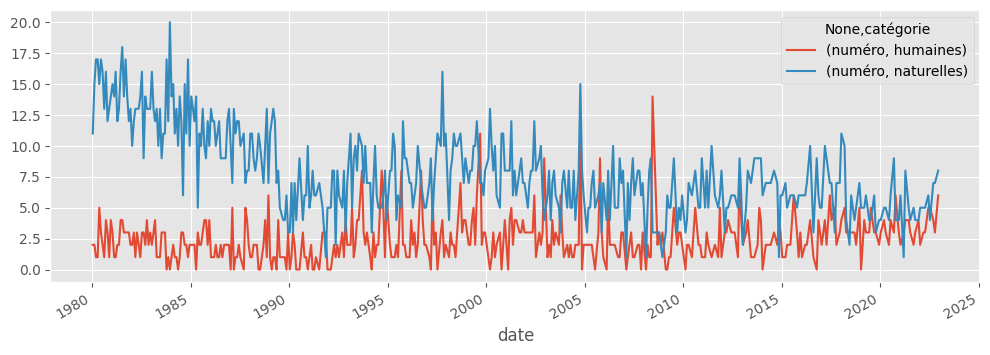

In [297]:
# évolution des nombres d'articles 'humanités' 'nature par no de janv. 1980 à déc. 2022

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

dh.plot(ax=ax)
dn.plot(ax=ax)

In [298]:
# création d'un fichier des totaux annuels d'articles en sces humaines

dhS_a = dh.resample("Y").sum()
dhS_a.columns = ["humaines"]
print(dhS_a.info())
dhS_a

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 1980-12-31 to 2022-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humaines  43 non-null     float64
dtypes: float64(1)
memory usage: 688.0 bytes
None


,humaines
date,
1980-12-31,29.0
1981-12-31,31.0
1982-12-31,29.0
1983-12-31,22.0
1984-12-31,19.0
1985-12-31,30.0
1986-12-31,18.0
1987-12-31,21.0
1988-12-31,21.0


In [299]:
# création d'un fichier des totaux annuels d'articles en sces de la nature

dnS_a = dn.resample("Y").sum()
dnS_a.columns = ["naturelles"]
print(dnS_a.info())
dnS_a

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 1980-12-31 to 2022-12-31
Freq: A-DEC
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   naturelles  43 non-null     float64
dtypes: float64(1)
memory usage: 688.0 bytes
None


,naturelles
date,
1980-12-31,176.0
1981-12-31,174.0
1982-12-31,153.0
1983-12-31,157.0
1984-12-31,148.0
1985-12-31,133.0
1986-12-31,131.0
1987-12-31,109.0
1988-12-31,106.0


<AxesSubplot: xlabel='date'>

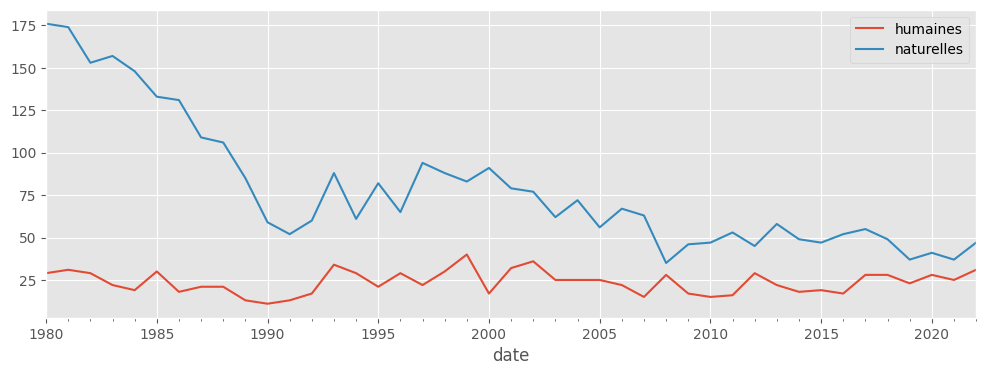

In [301]:
# évolution des nombres annuels d'articles 'humanités' 'nature'

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

dhS_a.plot(ax=ax)
dnS_a.plot(ax=ax)

In [302]:
# création d'un fichier des totaux d'articles en sces humaines par périodes de 2 ans.

dhS_2ans = dh.resample("2Y").sum()
dhS_2ans.columns = ["humaines"]
print(dhS_2ans.info())
dhS_2ans


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1980-12-31 to 2022-12-31
Freq: 2A-DEC
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   humaines  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes
None


,humaines
date,
1980-12-31,29.0
1982-12-31,60.0
1984-12-31,41.0
1986-12-31,48.0
1988-12-31,42.0
1990-12-31,24.0
1992-12-31,30.0
1994-12-31,63.0
1996-12-31,50.0


In [303]:
print(dhS_2ans.humaines.dtype)
print(type(dhS_2ans.humaines))
dhS_2ans.humaines

float64
<class 'pandas.core.series.Series'>


date
1980-12-31    29.0
1982-12-31    60.0
1984-12-31    41.0
1986-12-31    48.0
1988-12-31    42.0
1990-12-31    24.0
1992-12-31    30.0
1994-12-31    63.0
1996-12-31    50.0
1998-12-31    52.0
2000-12-31    57.0
2002-12-31    68.0
2004-12-31    50.0
2006-12-31    47.0
2008-12-31    43.0
2010-12-31    32.0
2012-12-31    45.0
2014-12-31    40.0
2016-12-31    36.0
2018-12-31    56.0
2020-12-31    51.0
2022-12-31    56.0
Freq: 2A-DEC, Name: humaines, dtype: float64

In [304]:
# sommation du nombre d'articles en sces de la nature par périodes de 2 ans

dnS_2ans = dn.resample("2Y").sum()
dnS_2ans.columns = ["naturelles"]
print(dnS_2ans.info())
dnS_2ans

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 1980-12-31 to 2022-12-31
Freq: 2A-DEC
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   naturelles  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes
None


,naturelles
date,
1980-12-31,176.0
1982-12-31,327.0
1984-12-31,305.0
1986-12-31,264.0
1988-12-31,215.0
1990-12-31,144.0
1992-12-31,112.0
1994-12-31,149.0
1996-12-31,147.0


In [305]:
print(dnS_2ans.naturelles.dtype)
print(type(dnS_2ans.naturelles))
dnS_2ans.naturelles

float64
<class 'pandas.core.series.Series'>


date
1980-12-31    176.0
1982-12-31    327.0
1984-12-31    305.0
1986-12-31    264.0
1988-12-31    215.0
1990-12-31    144.0
1992-12-31    112.0
1994-12-31    149.0
1996-12-31    147.0
1998-12-31    182.0
2000-12-31    174.0
2002-12-31    156.0
2004-12-31    134.0
2006-12-31    123.0
2008-12-31     98.0
2010-12-31     93.0
2012-12-31     98.0
2014-12-31    107.0
2016-12-31     99.0
2018-12-31    104.0
2020-12-31     78.0
2022-12-31     84.0
Freq: 2A-DEC, Name: naturelles, dtype: float64

<AxesSubplot: xlabel='date'>

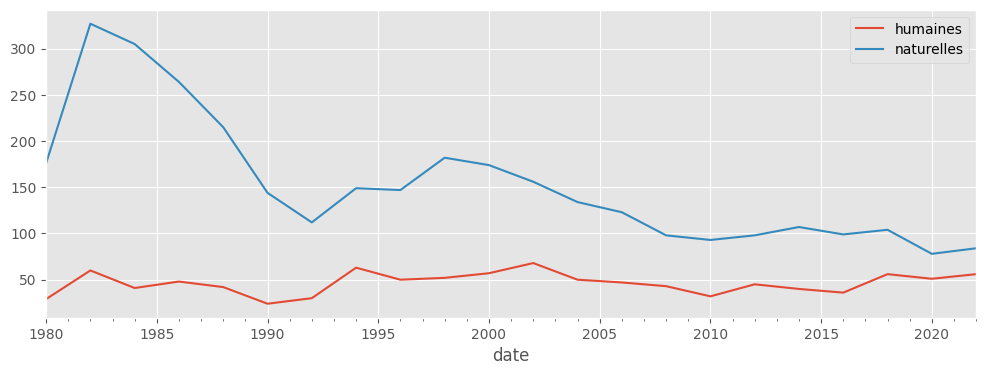

In [307]:
# évolution par périodes de 2 ans

fig, ax = plt.subplots(1, 1, figsize=(12, 4))

dhS_2ans.plot(ax=ax)
dnS_2ans.plot(ax=ax)

In [308]:
# échantillonnage par périodes de 4 ans

dh4a = dh.resample("4Y").sum()
dh4a.columns = ["humaines"]
dh4a

,humaines
date,
1980-12-31,29.0
1984-12-31,101.0
1988-12-31,90.0
1992-12-31,54.0
1996-12-31,113.0
2000-12-31,109.0
2004-12-31,118.0
2008-12-31,90.0
2012-12-31,77.0


In [309]:
# échantillonnage par périodes de 4 ans des articles sces de la nature

dn4a = dn.resample("4Y").sum()
dn4a.columns = ["naturelles"]
dn4a

,naturelles
date,
1980-12-31,176.0
1984-12-31,632.0
1988-12-31,479.0
1992-12-31,256.0
1996-12-31,296.0
2000-12-31,356.0
2004-12-31,290.0
2008-12-31,221.0
2012-12-31,191.0


In [311]:
# caclul du rapport articles en sces humaines / articles en sces de la nature

hnS_4ans_ratio = dh4a['humaines'] / dn4a['naturelles']
hnS_4ans_ratio

date
1980-12-31    0.164773
1984-12-31    0.159810
1988-12-31    0.187891
1992-12-31    0.210938
1996-12-31    0.381757
2000-12-31    0.306180
2004-12-31    0.406897
2008-12-31    0.407240
2012-12-31    0.403141
2016-12-31    0.368932
2020-12-31    0.587912
2024-12-31    0.666667
Freq: 4A-DEC, dtype: float64

In [312]:
# impression des rapports 'humanités'/'nature'

print(hnS_4ans_ratio.info())
print(hnS_4ans_ratio.dtype)
hnS_4ans_ratio

<class 'pandas.core.series.Series'>
DatetimeIndex: 12 entries, 1980-12-31 to 2024-12-31
Freq: 4A-DEC
Series name: None
Non-Null Count  Dtype  
--------------  -----  
12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes
None
float64


date
1980-12-31    0.164773
1984-12-31    0.159810
1988-12-31    0.187891
1992-12-31    0.210938
1996-12-31    0.381757
2000-12-31    0.306180
2004-12-31    0.406897
2008-12-31    0.407240
2012-12-31    0.403141
2016-12-31    0.368932
2020-12-31    0.587912
2024-12-31    0.666667
Freq: 4A-DEC, dtype: float64

In [313]:
# évolution du rapport 'humanités'/'nature' par périodes de 2 années

hnS_2ans_ratio = dhS_2ans['humaines'] / dnS_2ans['naturelles']
# hnS_2ans_ratio = (dh.resample("2Y").sum()/ dn.resample("2Y").sum())

# hnS_2ans_ratio.columns = ["ratio hum/nat 2a"]
print(hnS_2ans_ratio.info())
print(hnS_2ans_ratio.dtype)
hnS_2ans_ratio

<class 'pandas.core.series.Series'>
DatetimeIndex: 22 entries, 1980-12-31 to 2022-12-31
Freq: 2A-DEC
Series name: None
Non-Null Count  Dtype  
--------------  -----  
22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes
None
float64


date
1980-12-31    0.164773
1982-12-31    0.183486
1984-12-31    0.134426
1986-12-31    0.181818
1988-12-31    0.195349
1990-12-31    0.166667
1992-12-31    0.267857
1994-12-31    0.422819
1996-12-31    0.340136
1998-12-31    0.285714
2000-12-31    0.327586
2002-12-31    0.435897
2004-12-31    0.373134
2006-12-31    0.382114
2008-12-31    0.438776
2010-12-31    0.344086
2012-12-31    0.459184
2014-12-31    0.373832
2016-12-31    0.363636
2018-12-31    0.538462
2020-12-31    0.653846
2022-12-31    0.666667
Freq: 2A-DEC, dtype: float64

In [314]:
# création de la liste des rapports h/n sur périodes de 2 années

r = hnS_2ans_ratio.values
r1 = r.tolist()
print(type(r1))
print(len(r1))
r1

<class 'list'>
22


[0.16477272727272727,
 0.1834862385321101,
 0.13442622950819672,
 0.18181818181818182,
 0.19534883720930232,
 0.16666666666666666,
 0.26785714285714285,
 0.4228187919463087,
 0.3401360544217687,
 0.2857142857142857,
 0.3275862068965517,
 0.4358974358974359,
 0.373134328358209,
 0.3821138211382114,
 0.4387755102040816,
 0.34408602150537637,
 0.45918367346938777,
 0.37383177570093457,
 0.36363636363636365,
 0.5384615384615384,
 0.6538461538461539,
 0.6666666666666666]

<AxesSubplot: xlabel='date'>

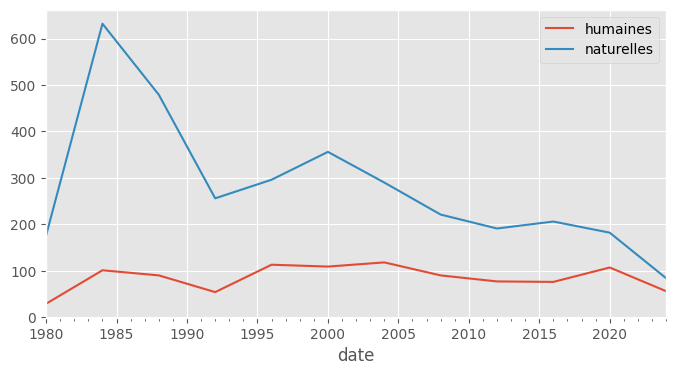

In [274]:
# graphique préliminaire de vérification

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

dh4a.plot(ax=ax)
dn4a.plot(ax=ax)

In [275]:
# création d'une chronologie de 22 périodes pour utilisation dans le calcul de la tendance

t = np.linspace(1980, 2024, 22)
t1 = t.tolist()
print(len(t1))
t1

22


[1980.0,
 1982.095238095238,
 1984.1904761904761,
 1986.2857142857142,
 1988.3809523809523,
 1990.4761904761904,
 1992.5714285714287,
 1994.6666666666667,
 1996.7619047619048,
 1998.857142857143,
 2000.952380952381,
 2003.047619047619,
 2005.142857142857,
 2007.2380952380952,
 2009.3333333333333,
 2011.4285714285713,
 2013.5238095238096,
 2015.6190476190477,
 2017.7142857142858,
 2019.8095238095239,
 2021.904761904762,
 2024.0]

In [276]:
# fontion unidimentionnalisant les fichiers pour calcul des tendances
# this function will help flatten some data to make it palatable to matplotlib and calculation of p-value

def flatten_list(nested_list):
    flat_list = []
    for sublist in nested_list:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [277]:
# vérification du type de fichiers

print(type(dnS_2ans.values))
print(dnS_2ans.values.dtype)

print(type(dhS_2ans.values))
print(dhS_2ans.values.dtype)

print(type(hnS_2ans_ratio))
print(hnS_2ans_ratio.dtype)

<class 'numpy.ndarray'>
float64
<class 'numpy.ndarray'>
float64
<class 'pandas.core.series.Series'>
float64


In [278]:
# extraction des nombre d'articles en sces de la nature par périodes de 2 années

dnS_2ans.values

array([[176.],
       [327.],
       [305.],
       [264.],
       [215.],
       [144.],
       [112.],
       [149.],
       [147.],
       [182.],
       [174.],
       [156.],
       [134.],
       [123.],
       [ 98.],
       [ 93.],
       [ 98.],
       [107.],
       [ 99.],
       [104.],
       [ 78.],
       [ 84.]])

In [279]:
# transformation de la liste de listes en une seule liste : unidimensionnalistion du fichier.

# natural sciences 2-year sums made into unidimensional list

y1 = dnS_2ans.values  
print(type(y1))
print(y1)
y3 = y1.tolist()
print(type(y3))
print(len(y3))
print(y3)
y5 = flatten_list(y3)
print(type(y5))
print(len(y5))
y5

<class 'numpy.ndarray'>
[[176.]
 [327.]
 [305.]
 [264.]
 [215.]
 [144.]
 [112.]
 [149.]
 [147.]
 [182.]
 [174.]
 [156.]
 [134.]
 [123.]
 [ 98.]
 [ 93.]
 [ 98.]
 [107.]
 [ 99.]
 [104.]
 [ 78.]
 [ 84.]]
<class 'list'>
22
[[176.0], [327.0], [305.0], [264.0], [215.0], [144.0], [112.0], [149.0], [147.0], [182.0], [174.0], [156.0], [134.0], [123.0], [98.0], [93.0], [98.0], [107.0], [99.0], [104.0], [78.0], [84.0]]
<class 'list'>
22


[176.0,
 327.0,
 305.0,
 264.0,
 215.0,
 144.0,
 112.0,
 149.0,
 147.0,
 182.0,
 174.0,
 156.0,
 134.0,
 123.0,
 98.0,
 93.0,
 98.0,
 107.0,
 99.0,
 104.0,
 78.0,
 84.0]

In [280]:
# unidimentionnalisation de la liste des nombres d'articles en sces humaines

# unidimensional list made from yearly humanities count

y2 = dhS_2ans.values  
print(type(y2))
print(y2)
y4 = y2.tolist()
print(type(y4))
print(len(y4))
print(y4)
y6 = flatten_list(y4)
print(type(y6))
print(len(y6))
y6

<class 'numpy.ndarray'>
[[29.]
 [60.]
 [41.]
 [48.]
 [42.]
 [24.]
 [30.]
 [63.]
 [50.]
 [52.]
 [57.]
 [68.]
 [50.]
 [47.]
 [43.]
 [32.]
 [45.]
 [40.]
 [36.]
 [56.]
 [51.]
 [56.]]
<class 'list'>
22
[[29.0], [60.0], [41.0], [48.0], [42.0], [24.0], [30.0], [63.0], [50.0], [52.0], [57.0], [68.0], [50.0], [47.0], [43.0], [32.0], [45.0], [40.0], [36.0], [56.0], [51.0], [56.0]]
<class 'list'>
22


[29.0,
 60.0,
 41.0,
 48.0,
 42.0,
 24.0,
 30.0,
 63.0,
 50.0,
 52.0,
 57.0,
 68.0,
 50.0,
 47.0,
 43.0,
 32.0,
 45.0,
 40.0,
 36.0,
 56.0,
 51.0,
 56.0]

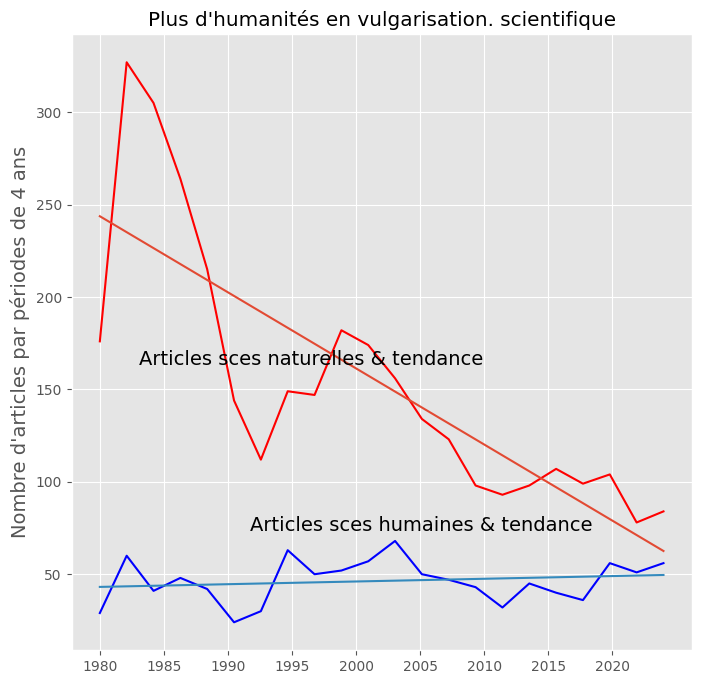

In [283]:
# création du graphique avec tendances

from matplotlib.text import OffsetFrom

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

x = t1     # chronologie pour le calcul de la tendance # time sapn
y1 = y5    # totaux des articles en sces de la nature # total of natural sces articles per 2-year periods
y2 = y6    # totaux des articles en sces humaines # total of humanities articles per 2-year periods
y3 = r1    # rapport 'humanités' / sces de la nature # ratio of humanities articles / natural sces articles

ax.set_title("Plus d'humanités en vulgarisation. scientifique")
ax.plot(x, y1, color="red", linewidth=1.5, linestyle="-")
ax.annotate("Articles sces humaines & tendance",
            xy=(180, 110), xycoords="figure points",
            fontsize=14)
ax.plot(x, y2, color="blue", linewidth=1.5, linestyle="-")
ax.annotate('Articles sces naturelles & tendance',
            xy=(100, 230), xycoords='figure points',
            fontsize=14)

z = np.polyfit(x, y1, 1)  # calcul des tendances : sces de la nature
p = np.poly1d(z)
plt.plot(x, p(x))
u = np.polyfit(x, y2, 1)   # calcul de la tendance sces humaines
v = np.poly1d(u)
plt.plot(x, v(x))

ax.set_ylabel("Nombre d'articles par périodes de 4 ans", fontsize=14)
ax.set_xticks([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020])
fig.savefig("Les humanités prennent plus de place en vulgarisation scientifique.png")

In [284]:
# unidimentionnalisation du rapport des articles par périodes de 4 ans

# flattening of ratios

hnS_4ans_ratio
r = hnS_4ans_ratio.values

r1 = r.tolist()
print(type(r1))
print(len(r1))
print(r1)

<class 'list'>
12
[0.16477272727272727, 0.15981012658227847, 0.18789144050104384, 0.2109375, 0.38175675675675674, 0.3061797752808989, 0.4068965517241379, 0.4072398190045249, 0.4031413612565445, 0.36893203883495146, 0.5879120879120879, 0.6666666666666666]


In [285]:
# nouvelle chronologie en 12 périodes de 4 ans

# new timespan for the time axis

x = np.linspace(1980, 2024, 12)
x1 = x.tolist()
print(len(x1))
x1

12


[1980.0,
 1984.0,
 1988.0,
 1992.0,
 1996.0,
 2000.0,
 2004.0,
 2008.0,
 2012.0,
 2016.0,
 2020.0,
 2024.0]

In [286]:
# importation des modules

from matplotlib.text import OffsetFrom

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')

import datetime

import scipy.stats as stats

# calcul du tau de Kendall et de la valeur p
# calculation of kendall's tau and p-value for the ratio values

tau, p_value = stats.kendalltau(x1, r1)
print('tau :', tau, 'et p_value :', p_value)

tau : 0.7575757575757575 et p_value : 0.00024002425044091711


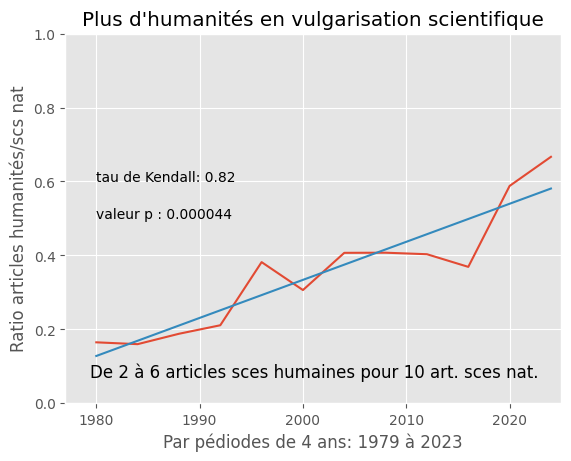

In [288]:
# graphique de la tendance du rapport entre le nombre d'articles en sces humaines et 
# le nombre d'articles en sciences de la nature

fig, ax = plt.subplots()
ax.plot(x1, r1)
ax.axis([1977, 2025, 0.0, 1.0])
m = np.polyfit(x1, r1, 1)
n = np.poly1d(m)
plt.plot(x1, n(x1))
ax.annotate('De 2 à 6 articles sces humaines pour 10 art. sces nat.',
            xy=(65, 60), xycoords='figure points',
            fontsize=12)
ax.set(title = "Plus d'humanités en vulgarisation scientifique",
       ylabel = "Ratio articles humanités/scs nat",
       xlabel = "Par pédiodes de 4 ans: 1979 à 2023")
ax.text(1980, 0.6, "tau de Kendall: 0.82")
ax.text(1980, 0.5, "valeur p : 0.000044")
fig.savefig("Plus d'humanités.png")